In [1]:
%matplotlib notebook
import datetime as dt
import matplotlib.pyplot as plt

Typhoon name: fengshen


<IPython.core.display.Javascript object>


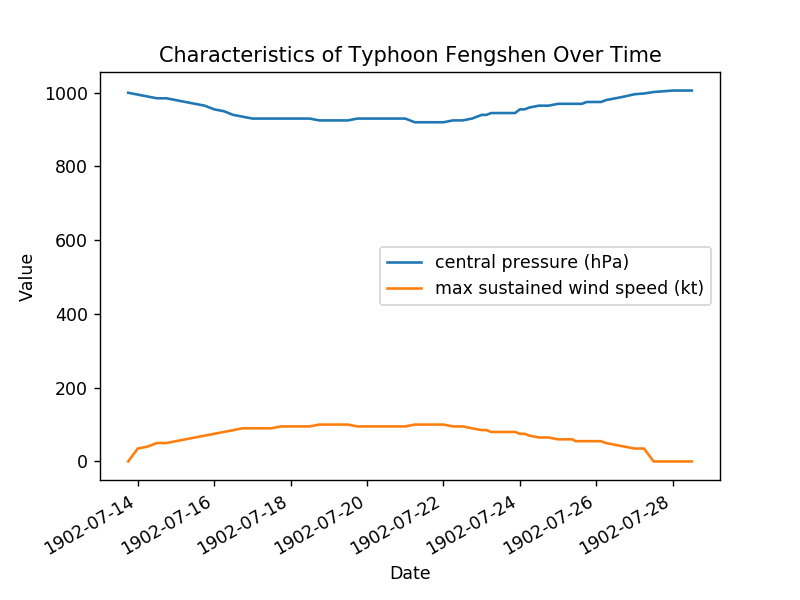

<IPython.core.display.Javascript object>


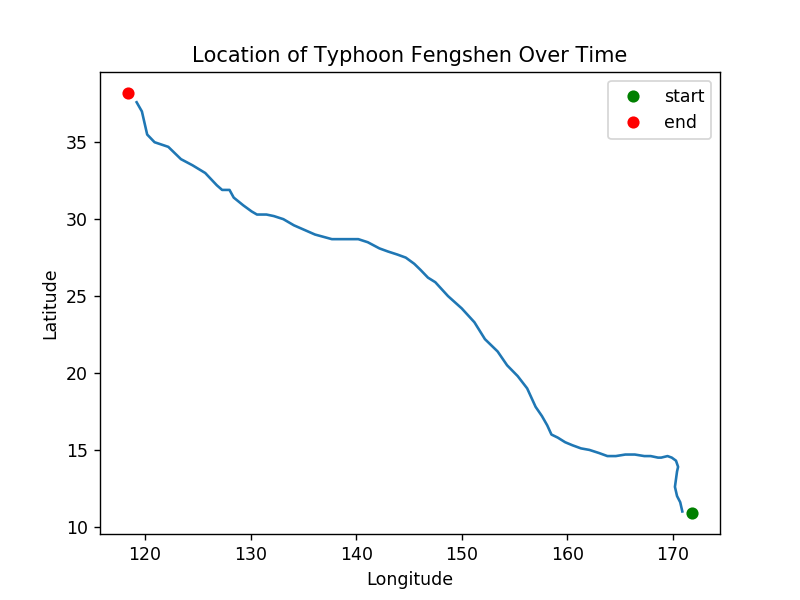

In [2]:
typhoon = input('Typhoon name: ')
date_format = '%Y%m%d%H'
dates = []
values = [[] for n in range(4)]
reading = False

with open('bst_all.txt') as data:
    for line in data:
        if reading:
            split = line.split()
            for value in split:    
                if value[0] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
                    break
            
            else:
                if len(split) >= 1:
                    dates.append(('19' if int(split[0][:2]) <= 99 else '20') + split[0])

                if len(split) >= 4:
                    values[0].append(int(split[3]) / 10)

                if len(split) >= 5:
                    values[1].append(int(split[4]) / 10)

                if len(split) >= 6:
                    values[2].append(int(split[5]))

                if len(split) >= 7:
                    values[3].append(int(split[6]))
                
                continue
            
            break
        
        elif line.find(typhoon.upper()) != -1:
            reading = True

if len(values[2]) == len(values[3]) == len(dates) >= 1:
    dates = [dt.datetime.strptime(date, date_format) for date in dates]

    fig0 = plt.figure(0)
    plt.plot(dates, values[2], label='central pressure (hPa)')
    plt.plot(dates, values[3], label='max sustained wind speed (kt)')

    plt.legend()
    plt.title('Characteristics of Typhoon ' + typhoon.capitalize() + ' Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.gcf().autofmt_xdate()
    fig0.show()

if len(values[0]) == len(values[1]) >= 1:
    fig1 = plt.figure(1)
    plt.plot(values[1][0], values[0][0], 'go', label='start')
    plt.plot(values[1][1:-1], values[0][1:-1])
    plt.plot(values[1][-1], values[0][-1], 'ro', label='end')

    plt.legend()
    plt.title('Location of Typhoon ' + typhoon.capitalize() + ' Over Time')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    fig1.show()